## Import libraries

In [12]:
import pints
import pints.toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt
import pints.toy as toy
from pints.toy import ToyModel
from scipy.integrate import odeint


## SIR Model

### Model Class

In [14]:
class SIRModel(pints.ForwardModel, ToyModel):
    r"""
    The SIR model of infectious disease models the number of susceptible (S),
    infected (I), and recovered (R) people in a population [1]_, [2]_.

    The particular model given here is analysed in [3],_ and is described by
    the following three-state ODE:

    .. math::
        \dot{S} = -\gamma S I

        \dot{I} = \gamma S I - v I

        \dot{R} = v I

    Where the parameters are ``gamma`` (infection rate), and ``v``, recovery
    rate. In addition, we assume the initial value of S, ``S0``, is unknwon,
    leading to a three parameter model ``(gamma, v, S0)``.

    The number of infected people and recovered people are observable, making
    this a 2-output system. S can be thought of as an unknown number of
    susceptible people within a larger population.

    The model does not account for births and deaths, which are assumed to
    happen much slower than the spread of the (non-lethal) disease.

    Real data is included via :meth:`suggested_values`, which was taken from
    [3]_, [4]_, [5]_.

    Extends :class:`pints.ForwardModel`, `pints.toy.ToyModel`.

    Parameters
    ----------
    y0
        The system's initial state, must have 3 entries all >=0.

    References
    ----------
    .. [1] A Contribution to the Mathematical Theory of Epidemics. Kermack,
           McKendrick (1927) Proceedings of the Royal Society A.
           https://doi.org/10.1098/rspa.1927.0118

    .. [2] https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

    .. [3] Approximate Bayesian computation scheme for parameter inference and
           model selection in dynamical systems. Toni, Welch, Strelkowa, Ipsen,
           Stumpf (2009) J. R. Soc. Interface.
           https://doi.org/10.1098/rsif.2008.0172

    .. [4] A mathematical model of common-cold epidemics on Tristan da Cunha.
           Hammond, Tyrrell (1971) Epidemiology & Infection.
           https://doi.org/10.1017/S0022172400021677

    .. [5] Common colds on Tristan da Cunha. Shybli, Gooch, Lewis, Tyrell
           (1971) Epidemiology & Infection.
           https://doi.org/10.1017/S0022172400021483
    """

    def __init__(self, y0=None):
        super(SIRModel, self).__init__()

        # Check initial values
        if y0 is None:
            # Toni et al.:
            self._y0 = np.array([38, 1, 0])
        else:
            self._y0 = np.array(y0, dtype=float)
            if len(self._y0) != 3:
                raise ValueError('Initial value must have size 3.')
            if np.any(self._y0 < 0):
                raise ValueError('Initial states can not be negative.')



    def n_outputs(self):
        """ See :meth:`pints.ForwardModel.n_outputs()`. """
        return 3





    def n_parameters(self):
        """ See :meth:`pints.ForwardModel.n_parameters()`. """
        return 3



    def _rhs(self, y, t, gamma, v):
        """
        Calculates the model RHS.
        """
        dS = -gamma * y[0] * y[1]
        dI = gamma * y[0] * y[1] - v * y[1]
        dR = v * y[1]
        return np.array([dS, dI, dR])



    def simulate(self, parameters, times):
        """ See :meth:`pints.ForwardModel.simulate()`. """
        gamma, v, S0 = parameters
        y0 = np.array(self._y0, copy=True)
        y0[0] = S0
        y = odeint(self._rhs, y0, times, (gamma, v))
        return y[:, :]





    def suggested_parameters(self):
        """
        Returns a suggested set of parameters for this toy model.
        """
        # Guesses based on Toni et al.:
        return [0.026, 0.285, 38]





    def suggested_times(self):
        """
        Returns a suggested set of simulation times for this toy model.
        """
        # Toni et al.:
        return np.arange(1, 22)





    def suggested_values(self):
        """
        Returns the data from a common-cold outbreak on the remote island of
        Tristan da Cunha, as given in [3]_, [4]_, [5]_.
        """
        # Toni et al.
        return np.array([
            [1, 0],     # day 1
            [1, 0],
            [3, 0],
            [7, 0],
            [6, 5],     # day 5
            [10, 7],
            [13, 8],
            [13, 13],
            [14, 13],
            [14, 16],    # day 10
            [17, 17],
            [10, 24],
            [6, 30],
            [6, 31],
            [4, 33],    # day 15
            [3, 34],
            [1, 36],
            [1, 36],
            [1, 36],
            [1, 36],    # day 20
            [0, 37],    # day 21
        ])

Parameters:
[0.026, 0.285, 38]


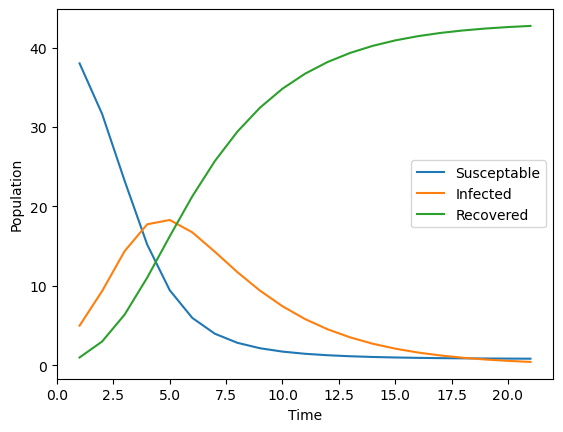

In [20]:
y = [70, 5, 1]
# Create a model
model = SIRModel(y0=y)

# Run a simulation
parameters = model.suggested_parameters()
times = model.suggested_times()
values = model.simulate(parameters, times)

print('Parameters:')
print(parameters)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Population')
plt.plot(times, values)
plt.legend(['Susceptable','Infected', 'Recovered'])
plt.show()

## Mounting data

### Google Cloud

In [ ]:
## Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#%cd /content/gdrive/MyDrive/
#%mkdir -p SyntheticData/SIR
#%cd SyntheticData/SIR

### Local Directory

In [ ]:
import os
os.makedirs("SyntheticData/SIR", exist_ok=True)
os.chdir("SyntheticData/SIR")

### Generating training and Validation data

In [ ]:
# Generating unique combination for the SIR and model parameters
# N is the total population (50 Million) where S+I+R=N
# I is the number of people infected with the disease and I0 is between 1000 and 10000
# R is the number of people who have recovered from the disease and R0 is between 500 and 5000
# S = N - I - R
# parameters = [gamma, v, S0]
# gamma is the rate of infection between 0.0000002 and 0.000001
# v is the rate of recovery between 0.05 and 0.15
# S0 is the number of people who are susceptible to the disease at the beginning of the epidemic which is S

# the combination should be unique and the number of unique combinations should be 1088

# combination list
combination = []
# combination count
count = 0
# total population
N = 50000000

while count < 1088:
    I0 = np.random.randint(1000, 10000)
    R0 = np.random.randint(500, 5000)
    S0 = N - I0 - R0
    gamma = np.random.uniform(0.0000002, 0.000001)
    v = np.random.uniform(0.05, 0.15)
    c = [S0, I0, R0, gamma, v]
    # check if the combination is not in combination list
    if c not in combination:
        combination.append(c)
        count += 1
    else:
        continue




In [ ]:
# simulate function that takes the combination item and returns the values
def simulate(combination):
    S0, I0, R0, gamma, v = combination
    y0 = [S0, I0, R0]
    model = SIRModel(y0=y0)
    times = model.suggested_times()
    values = model.simulate([gamma, v, S0], times)
    return values

In [ ]:
import h5py
f = h5py.File('SIR_Training.hdf5', 'w')
g = h5py.File('SIR_Validation.hdf5', 'w')
for idx, c in enumerate(combination):
    values = simulate(c)
    if idx < 1024:
        # save the dataset in the SIR_Training.hdf5 file
        f.create_dataset(str(idx), data=values)
    else:
        # save the dataset in the SIR_Validation.hdf5 file
        g.create_dataset(str(idx - 1024), data=values)
f.close()
g.close()

